<a href="https://colab.research.google.com/github/Mohamed-derbeli/Natural-Language-Processing-in-TensorFlow/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [4]:
#!pip install tensorflow==2.5.0

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [6]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 34.4MB/s]


In [11]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Your Embedding Layer)
model.add(Bidirectional(LSTM(50, return_sequences = True)))            # An LSTM Layer)
model.add(Dropout(0.2))                                                # A dropout layer)
model.add(Bidirectional(LSTM(50)))                                     # Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))      # A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))                    # A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
### END CODE HERE
    
print(model.summary())

#----------regularization----------- 

#Regularization help reduce Overfitting
# Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn 
#improves the model’s performance on the unseen data as well. Regularization penalizes the coefficients. it actually penalizes the weight matrices 
#of the nodes.Regularization coefficient is so high -----> some of the weight matrices are nearly equal to zero----> result in a much simpler 
#linear network and slight underfitting of the training data.

#  Regularization Techniques in Deep Learning: 
# L2 & L1 regularization: L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known
                        # as the regularization term. ''Cost function = Loss (say, binary cross entropy) + Regularization term''
                        #Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural 
                        #network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent. 
# Dropout: At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below. 
# Data Augmentation: Data Augmentation The simplest way to reduce overfitting is to increase the size of the training data. In machine learning, we  
                  # were not able to increase the size of training data as the labeled data was too costly. But, now let’s consider we are dealing 
                  # with images. In this case, there are a few ways of increasing the size of the training data – rotating the image, flipping, scaling,
                  #  shifting, etc. In the below image, some transformation has been done on the handwritten digits dataset.                 
                  # This technique is known as data augmentation. This usually provides a big leap in improving the accuracy of the model. It can be 
                  # considered as a mandatory trick in order to improve our predictions.
                  # In keras, we can perform all of these transformations using ImageDataGenerator. It has a big list of arguments which you you can 
                  # use to pre-process your training data. 
# Early stopping: Early stopping is a kind of cross-validation strategy where we keep one part of the training set as the validation set. When we 
                  # see that the performance on the validation set is getting worse, we immediately stop the training on the model. This is known 
                  #as early stopping. In keras, we can apply early stopping using the callbacks function. Below is the sample code for it.
                  # from keras.callbacks import EarlyStopping
                  # EarlyStopping(monitor='val_err', patience=5)
                  # Here, monitor denotes the quantity that needs to be monitored and ‘val_err’ denotes the validation error.
                  # Patience denotes the number of epochs with no further improvement after which the training will be stopped

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           321100    
                                                                 
 bidirectional_2 (Bidirectio  (None, 10, 100)          60400     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 100)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1605)              162105    
                                                                 
 dense_3 (Dense)             (None, 3211)             

In [16]:
 history = model.fit(predictors, label, epochs=100, verbose=0)# epochs=100

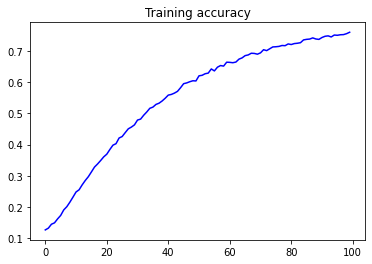

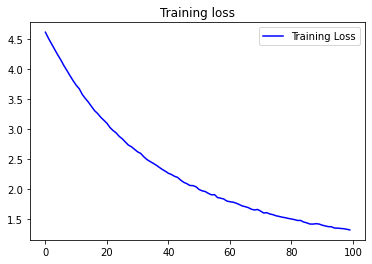

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [18]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	# predicted = model.predict_classes(token_list, verbose=0)
	predict_x=model.predict(token_list) 
	predicted=np.argmax(predict_x,axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of such deep key must be none dear know it not grace some worth false before make another mother taken be trim glory so stand me kind and not blind best or grace keep her living age doth decay show dead wrong or store sweet lie down her me did show me great under me wrong arising days prove dead blot me go store new hours her age ' be ' change ' prove to pleasure none desire give dead blot myself be lease days days days did swear so you i do not engraft me show thee such pride
